<a href="https://colab.research.google.com/github/vanbestzyno/thu1/blob/main/air_dabien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 18.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import pmdarima as pm

In [ ]:
ar = pd.read_csv('DataAirTrain.csv')
ar.head()

,Unnamed: 0,Unnamed: 0.1,Barometer,Temp,NO,PM-10,RH,Radiation,WindDir,SO2,...,CO,PM-1,O3,Wind Spd,TSP,time,Hướng gió,Nhiệt độ,Áp suất khí quyển,Wind Spd (sai)
0,0,0,1010.28,25.55,18.57,18.12,98.55,0.01,188.88,19.17,...,461.82,3.43,-17.17,1.48,31.02,14/4/2019 07:00:00,NaN,NaN,NaN,NaN
1,1,1,1011.21,25.17,11.61,17.25,99.62,32.83,194.24,13.49,...,595.40,3.43,-3.70,1.55,31.13,14/4/2019 08:00:00,NaN,NaN,NaN,NaN
2,2,2,1012.36,25.86,8.79,12.04,97.46,311.73,108.60,6.68,...,553.42,2.43,3.09,1.24,21.29,14/4/2019 09:00:00,NaN,NaN,NaN,NaN
3,3,3,1012.66,27.67,11.33,10.91,88.45,532.91,119.74,5.77,...,446.55,2.14,8.60,1.78,19.24,14/4/2019 10:00:00,NaN,NaN,NaN,NaN
4,4,4,1012.78,29.14,5.50,8.91,77.99,610.51,116.88,5.72,...,435.10,1.87,33.08,1.56,18.48,14/4/2019 11:00:00,NaN,NaN,NaN,NaN


In [ ]:
ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3414 entries, 0 to 3413
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3414 non-null   int64  
 1   Unnamed: 0.1       3414 non-null   int64  
 2   Barometer          3414 non-null   float64
 3   Temp               3414 non-null   float64
 4   NO                 3402 non-null   float64
 5   PM-10              3317 non-null   float64
 6   RH                 3316 non-null   float64
 7   Radiation          2060 non-null   float64
 8   WindDir            3414 non-null   float64
 9   SO2                3350 non-null   float64
 10  NOx                3403 non-null   float64
 11  NO2                3216 non-null   float64
 12  Compass            3236 non-null   float64
 13  PM-2-5             3317 non-null   float64
 14  CO                 3409 non-null   float64
 15  PM-1               3317 non-null   float64
 16  O3                 3157 

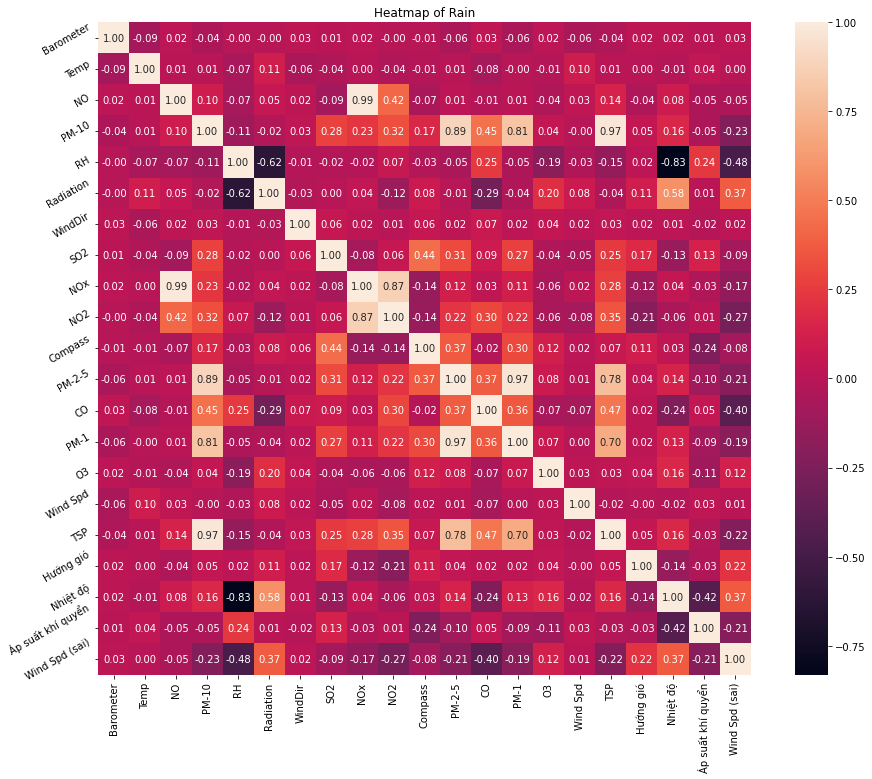

In [ ]:
ar.drop(['Unnamed: 0.1','Unnamed: 0'],axis = 1,inplace = True)

correlation = ar.corr()
plt.figure(figsize=(16,12))
plt.title('Heatmap of Rain')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

In [ ]:
ar['Datetime'] = pd.to_datetime(ar['time'],dayfirst=True) 
ar['Date'] = pd.to_datetime(ar['Datetime']).dt.date
ar['Time'] = pd.to_datetime(ar['Datetime']).dt.time

ar.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3414 entries, 0 to 3413
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Barometer          3414 non-null   float64       
 1   Temp               3414 non-null   float64       
 2   NO                 3402 non-null   float64       
 3   PM-10              3317 non-null   float64       
 4   RH                 3316 non-null   float64       
 5   Radiation          2060 non-null   float64       
 6   WindDir            3414 non-null   float64       
 7   SO2                3350 non-null   float64       
 8   NOx                3403 non-null   float64       
 9   NO2                3216 non-null   float64       
 10  Compass            3236 non-null   float64       
 11  PM-2-5             3317 non-null   float64       
 12  CO                 3409 non-null   float64       
 13  PM-1               3317 non-null   float64       
 14  O3      

In [ ]:
ar.head(5)

,Barometer,Temp,NO,PM-10,RH,Radiation,WindDir,SO2,NOx,NO2,...,Wind Spd,TSP,time,Hướng gió,Nhiệt độ,Áp suất khí quyển,Wind Spd (sai),Datetime,Date,Time
0,1010.28,25.55,18.57,18.12,98.55,0.01,188.88,19.17,68.232,78.45,...,1.48,31.02,14/4/2019 07:00:00,NaN,NaN,NaN,NaN,2019-04-14 07:00:00,2019-04-14,07:00:00
1,1011.21,25.17,11.61,17.25,99.62,32.83,194.24,13.49,48.492,58.17,...,1.55,31.13,14/4/2019 08:00:00,NaN,NaN,NaN,NaN,2019-04-14 08:00:00,2019-04-14,08:00:00
2,1012.36,25.86,8.79,12.04,97.46,311.73,108.60,6.68,30.564,34.38,...,1.24,21.29,14/4/2019 09:00:00,NaN,NaN,NaN,NaN,2019-04-14 09:00:00,2019-04-14,09:00:00
3,1012.66,27.67,11.33,10.91,88.45,532.91,119.74,5.77,30.996,31.16,...,1.78,19.24,14/4/2019 10:00:00,NaN,NaN,NaN,NaN,2019-04-14 10:00:00,2019-04-14,10:00:00
4,1012.78,29.14,5.50,8.91,77.99,610.51,116.88,5.72,23.676,28.68,...,1.56,18.48,14/4/2019 11:00:00,NaN,NaN,NaN,NaN,2019-04-14 11:00:00,2019-04-14,11:00:00


In [ ]:
ar.drop(['time','Datetime'],axis = 1,inplace = True)


In [ ]:
ar.head()

,Barometer,Temp,NO,PM-10,RH,Radiation,WindDir,SO2,NOx,NO2,...,PM-1,O3,Wind Spd,TSP,Hướng gió,Nhiệt độ,Áp suất khí quyển,Wind Spd (sai),Date,Time
0,1010.28,25.55,18.57,18.12,98.55,0.01,188.88,19.17,68.232,78.45,...,3.43,-17.17,1.48,31.02,NaN,NaN,NaN,NaN,2019-04-14,07:00:00
1,1011.21,25.17,11.61,17.25,99.62,32.83,194.24,13.49,48.492,58.17,...,3.43,-3.70,1.55,31.13,NaN,NaN,NaN,NaN,2019-04-14,08:00:00
2,1012.36,25.86,8.79,12.04,97.46,311.73,108.60,6.68,30.564,34.38,...,2.43,3.09,1.24,21.29,NaN,NaN,NaN,NaN,2019-04-14,09:00:00
3,1012.66,27.67,11.33,10.91,88.45,532.91,119.74,5.77,30.996,31.16,...,2.14,8.60,1.78,19.24,NaN,NaN,NaN,NaN,2019-04-14,10:00:00
4,1012.78,29.14,5.50,8.91,77.99,610.51,116.88,5.72,23.676,28.68,...,1.87,33.08,1.56,18.48,NaN,NaN,NaN,NaN,2019-04-14,11:00:00


In [ ]:
ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3414 entries, 0 to 3413
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Barometer          3414 non-null   float64
 1   Temp               3414 non-null   float64
 2   NO                 3402 non-null   float64
 3   PM-10              3317 non-null   float64
 4   RH                 3316 non-null   float64
 5   Radiation          2060 non-null   float64
 6   WindDir            3414 non-null   float64
 7   SO2                3350 non-null   float64
 8   NOx                3403 non-null   float64
 9   NO2                3216 non-null   float64
 10  Compass            3236 non-null   float64
 11  PM-2-5             3317 non-null   float64
 12  CO                 3409 non-null   float64
 13  PM-1               3317 non-null   float64
 14  O3                 3157 non-null   float64
 15  Wind Spd           3414 non-null   float64
 16  TSP                3317 

In [ ]:
value_counts = ar.dtypes.value_counts()

print(value_counts)

float64    21
object      2
dtype: int64


In [ ]:
miss_val = pd.DataFrame(ar.isnull().sum(), columns=['No. of missing values'])
miss_val['% missing_values'] = (miss_val/len(ar)).round(2)*100
miss_val

,No. of missing values,% missing_values
Barometer,0,0.0
Temp,0,0.0
NO,12,0.0
PM-10,97,3.0
RH,98,3.0
Radiation,1354,40.0
WindDir,0,0.0
SO2,64,2.0
NOx,11,0.0
NO2,198,6.0


Xử lý 4 giờ thiếu

In [ ]:
ar.loc[1925.3] = [np.NaN, np.NaN, np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,'4/7/2019','09:00:00']
ar.loc[1925.4] = [np.NaN, np.NaN, np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,'4/7/2019','10:00:00']
ar.loc[1925.5] = [np.NaN, np.NaN, np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,'4/7/2019','11:00:00']
ar.loc[1925.6] = [np.NaN, np.NaN, np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,'4/7/2019','12:00:00']
ar = ar.sort_index().reset_index(drop=True)
ar.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3418 entries, 0 to 3417
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Barometer          3414 non-null   float64
 1   Temp               3414 non-null   float64
 2   NO                 3402 non-null   float64
 3   PM-10              3317 non-null   float64
 4   RH                 3316 non-null   float64
 5   Radiation          2060 non-null   float64
 6   WindDir            3414 non-null   float64
 7   SO2                3350 non-null   float64
 8   NOx                3403 non-null   float64
 9   NO2                3216 non-null   float64
 10  Compass            3236 non-null   float64
 11  PM-2-5             3317 non-null   float64
 12  CO                 3409 non-null   float64
 13  PM-1               3317 non-null   float64
 14  O3                 3157 non-null   float64
 15  Wind Spd           3414 non-null   float64
 16  TSP                3317 

Xử lý biến 
Radiation: Thay giá trị null bằng 0
NO: Thay null bằng trung bình

In [ ]:
ar['NO'].fillna(value=0, inplace=True)
ar.fillna(ar.mean(), inplace=True)

<ipython-input-14-795e916da993>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ar.fillna(ar.mean(), inplace=True)


In [ ]:
ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3418 entries, 0 to 3417
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Barometer          3418 non-null   float64
 1   Temp               3418 non-null   float64
 2   NO                 3418 non-null   float64
 3   PM-10              3418 non-null   float64
 4   RH                 3418 non-null   float64
 5   Radiation          3418 non-null   float64
 6   WindDir            3418 non-null   float64
 7   SO2                3418 non-null   float64
 8   NOx                3418 non-null   float64
 9   NO2                3418 non-null   float64
 10  Compass            3418 non-null   float64
 11  PM-2-5             3418 non-null   float64
 12  CO                 3418 non-null   float64
 13  PM-1               3418 non-null   float64
 14  O3                 3418 non-null   float64
 15  Wind Spd           3418 non-null   float64
 16  TSP                3418 

In [ ]:
ar['Date'] = pd.to_datetime(ar['Date']).dt.date
ar.index = ar['Date']
ar.head()

,Barometer,Temp,NO,PM-10,RH,Radiation,WindDir,SO2,NOx,NO2,...,PM-1,O3,Wind Spd,TSP,Hướng gió,Nhiệt độ,Áp suất khí quyển,Wind Spd (sai),Date,Time
Date,,,,,,,,,,,,,,,,,,,,,
2019-04-14,1010.28,25.55,18.57,18.12,98.55,0.01,188.88,19.17,68.232,78.45,...,3.43,-17.17,1.48,31.02,145.153833,29.559077,1002.913917,1.320863,2019-04-14,07:00:00
2019-04-14,1011.21,25.17,11.61,17.25,99.62,32.83,194.24,13.49,48.492,58.17,...,3.43,-3.70,1.55,31.13,145.153833,29.559077,1002.913917,1.320863,2019-04-14,08:00:00
2019-04-14,1012.36,25.86,8.79,12.04,97.46,311.73,108.60,6.68,30.564,34.38,...,2.43,3.09,1.24,21.29,145.153833,29.559077,1002.913917,1.320863,2019-04-14,09:00:00
2019-04-14,1012.66,27.67,11.33,10.91,88.45,532.91,119.74,5.77,30.996,31.16,...,2.14,8.60,1.78,19.24,145.153833,29.559077,1002.913917,1.320863,2019-04-14,10:00:00
2019-04-14,1012.78,29.14,5.50,8.91,77.99,610.51,116.88,5.72,23.676,28.68,...,1.87,33.08,1.56,18.48,145.153833,29.559077,1002.913917,1.320863,2019-04-14,11:00:00


Dự đoán Nox theo NO, NO2

In [ ]:
ar1 = ar[['NOx','NO', 'NO2']]
ar1.head()

,NOx,NO,NO2
Date,,,
2019-04-14,68.232,18.57,78.45
2019-04-14,48.492,11.61,58.17
2019-04-14,30.564,8.79,34.38
2019-04-14,30.996,11.33,31.16
2019-04-14,23.676,5.50,28.68


In [ ]:
ar1.shape

(3418, 3)

In [ ]:
#from statsmodels.tsa.statespace.varmax import VARMAX
# var_model = VARMAX(train_df, order=(4,0),enforce_stationarity= True)
# fitted_model = var_model.fit(disp=False)
#print(fitted_model.summary())
     

In [ ]:
train = ar1
valid = ar1[-30:]
print(valid)

              NOx    NO        NO2
Date                              
2019-09-04  2.400  2.52  40.841085
2019-09-04  2.988  2.42   0.980000
2019-09-04  2.604  2.40   0.400000
2019-09-04  2.052  2.46  40.841085
2019-09-04  2.196  2.46  40.841085
2019-09-04  2.316  2.51  40.841085
2019-09-04  2.340  2.27   0.200000
2019-09-04  3.420  2.35   1.750000
2019-09-04  5.436  2.71   4.350000
2019-09-04  5.364  3.09   3.680000
2019-09-04  5.544  3.11   3.890000
2019-09-04  5.064  2.84   3.570000
2019-09-04  3.288  2.65   1.100000
2019-09-04  2.316  2.47  40.841085
2019-09-04  2.616  2.47   0.290000
2019-09-04  3.360  2.58   1.290000
2019-09-04  3.324  2.51   1.370000
2019-09-04  4.704  2.49   3.560000
2019-09-04  6.144  2.51   5.790000
2019-09-04  5.880  2.60   5.230000
2019-09-04  3.636  2.62   1.680000
2019-09-04  2.808  2.62   0.400000
2019-09-04  2.784  2.47   0.570000
2019-09-05  3.036  2.35   1.150000
2019-09-05  2.616  2.29   0.580000
2019-09-05  2.448  2.31   0.290000
2019-09-05  2.400  2

In [ ]:
from statsmodels.tsa.statespace.varmax import VARMAX
train_diff = train.diff()
train_diff.dropna(inplace = True)
train_diff

,NOx,NO,NO2
Date,,,
2019-04-14,-19.740,-6.96,-20.280000
2019-04-14,-17.928,-2.82,-23.790000
2019-04-14,0.432,2.54,-3.220000
2019-04-14,-7.320,-5.83,-2.480000
2019-04-14,23.772,8.03,24.920000
...,...,...,...
2019-09-05,-0.168,0.02,-0.290000
2019-09-05,-0.048,-0.01,-0.060000
2019-09-05,0.120,0.17,-0.060000


In [ ]:
model = VARMAX(train_diff, order=(0,2)).fit( disp=False)
result = model.forecast(steps = 48)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
def inverse_diff(actual_df, pred_df):
    df_res = pred_df.copy()
    columns = actual_df.columns
    for col in columns: 
        df_res[str(col)+'pred'] = actual_df[col].iloc[-1] + df_res[str(col)].cumsum()
    return df_res

In [ ]:
res = inverse_diff(ar1[['NOx', 'NO', 'NO2']],result)

In [ ]:
res = res['NOxpred']
print(res)

3417    6.078824
3418    6.365710
3419    6.347165
3420    6.328620
3421    6.310075
3422    6.291530
3423    6.272985
3424    6.254440
3425    6.235895
3426    6.217350
3427    6.198805
3428    6.180260
3429    6.161715
3430    6.143170
3431    6.124625
3432    6.106080
3433    6.087535
3434    6.068990
3435    6.050444
3436    6.031899
3437    6.013354
3438    5.994809
3439    5.976264
3440    5.957719
3441    5.939174
3442    5.920629
3443    5.902084
3444    5.883539
3445    5.864994
3446    5.846449
3447    5.827904
3448    5.809359
3449    5.790814
3450    5.772269
3451    5.753724
3452    5.735179
3453    5.716634
3454    5.698089
3455    5.679544
3456    5.660999
3457    5.642454
3458    5.623909
3459    5.605364
3460    5.586819
3461    5.568273
3462    5.549728
3463    5.531183
3464    5.512638
Name: NOxpred, dtype: float64


Dự đoán PM-10, PM-2-5, PM-1,TSP

In [ ]:
ar2 = ar[['PM-1','PM-2-5','PM-10','TSP']]
ar2

,PM-1,PM-2-5,PM-10,TSP
Date,,,,
2019-04-14,3.43,7.48,18.12,31.02
2019-04-14,3.43,7.63,17.25,31.13
2019-04-14,2.43,5.31,12.04,21.29
2019-04-14,2.14,4.48,10.91,19.24
2019-04-14,1.87,3.68,8.91,18.48
...,...,...,...,...
2019-09-05,2.98,5.44,12.86,23.62
2019-09-05,3.01,5.37,10.30,18.27
2019-09-05,2.98,5.32,10.48,17.82


In [ ]:
train = ar2
valid = ar2[-30:]
print(valid)

            PM-1  PM-2-5  PM-10    TSP
Date                                  
2019-09-04  3.88    6.54  11.96  22.27
2019-09-04  4.35    7.38  12.09  19.16
2019-09-04  3.52    6.13  10.72  17.73
2019-09-04  3.02    5.21  10.13  19.91
2019-09-04  3.06    5.33  10.67  18.71
2019-09-04  2.70    4.90  11.19  20.49
2019-09-04  2.65    4.94  12.56  22.11
2019-09-04  3.03    5.68  13.73  23.91
2019-09-04  3.45    6.66  16.38  27.27
2019-09-04  3.48    7.02  19.94  36.31
2019-09-04  3.52    7.04  20.44  37.22
2019-09-04  4.23    8.01  20.33  40.08
2019-09-04  3.97    7.12  15.52  28.43
2019-09-04  4.13    6.90  12.54  21.03
2019-09-04  5.86   10.19  21.49  41.39
2019-09-04  5.25    9.73  25.39  50.51
2019-09-04  4.68    8.97  23.36  48.42
2019-09-04  8.34   14.41  31.77  56.43
2019-09-04  9.92   16.47  35.44  65.32
2019-09-04  8.44   13.77  30.89  57.33
2019-09-04  4.93    8.88  20.50  37.39
2019-09-04  3.66    6.95  16.77  30.47
2019-09-04  3.45    6.53  17.28  30.21
2019-09-05  3.42    6.35 

In [ ]:
from statsmodels.tsa.statespace.varmax import VARMAX
train_diff = train.diff()
train_diff.dropna(inplace = True)

In [ ]:
model = VARMAX(train_diff, order=(0,2)).fit( disp=False)
result = model.forecast(steps = 48)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
res1 = inverse_diff(ar[['PM-1','PM-2-5','PM-10','TSP']],result)
res1 = res1[['PM-1pred','PM-2-5pred','PM-10pred','TSPpred']]
print(res1)

      PM-1pred  PM-2-5pred  PM-10pred    TSPpred
3417  3.795025    7.082674  14.556436  24.777020
3418  3.726410    6.838100  13.797000  23.722851
3419  3.725077    6.835477  13.793769  23.719802
3420  3.723743    6.832854  13.790539  23.716753
3421  3.722410    6.830231  13.787308  23.713704
3422  3.721076    6.827609  13.784077  23.710655
3423  3.719742    6.824986  13.780847  23.707606
3424  3.718409    6.822363  13.777616  23.704557
3425  3.717075    6.819740  13.774386  23.701508
3426  3.715742    6.817118  13.771155  23.698459
3427  3.714408    6.814495  13.767924  23.695410
3428  3.713074    6.811872  13.764694  23.692362
3429  3.711741    6.809249  13.761463  23.689313
3430  3.710407    6.806627  13.758233  23.686264
3431  3.709074    6.804004  13.755002  23.683215
3432  3.707740    6.801381  13.751771  23.680166
3433  3.706407    6.798758  13.748541  23.677117
3434  3.705073    6.796136  13.745310  23.674068
3435  3.703739    6.793513  13.742080  23.671019
3436  3.702406    6.

Dự báo NO theo NOx

In [ ]:
ar3 = ar[['NO', 'NOx']]
train = ar3
valid = ar3[-30:]
print(valid)

              NO    NOx
Date                   
2019-09-04  2.52  2.400
2019-09-04  2.42  2.988
2019-09-04  2.40  2.604
2019-09-04  2.46  2.052
2019-09-04  2.46  2.196
2019-09-04  2.51  2.316
2019-09-04  2.27  2.340
2019-09-04  2.35  3.420
2019-09-04  2.71  5.436
2019-09-04  3.09  5.364
2019-09-04  3.11  5.544
2019-09-04  2.84  5.064
2019-09-04  2.65  3.288
2019-09-04  2.47  2.316
2019-09-04  2.47  2.616
2019-09-04  2.58  3.360
2019-09-04  2.51  3.324
2019-09-04  2.49  4.704
2019-09-04  2.51  6.144
2019-09-04  2.60  5.880
2019-09-04  2.62  3.636
2019-09-04  2.62  2.808
2019-09-04  2.47  2.784
2019-09-05  2.35  3.036
2019-09-05  2.29  2.616
2019-09-05  2.31  2.448
2019-09-05  2.30  2.400
2019-09-05  2.47  2.520
2019-09-05  2.48  2.388
2019-09-05  2.55  4.584


In [ ]:
from statsmodels.tsa.statespace.varmax import VARMAX
train_diff = train.diff()
train_diff.dropna(inplace = True)

In [ ]:
model = VARMAX(train_diff, order=(0,2)).fit( disp=False)
result = model.forecast(steps = 48)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
res3 = inverse_diff(ar[['NO', 'NOx']],result)
res3 = res3[['NOpred']]
print(res3)

        NOpred
3417  2.674419
3418  2.315370
3419  2.311060
3420  2.306751
3421  2.302442
3422  2.298133
3423  2.293824
3424  2.289514
3425  2.285205
3426  2.280896
3427  2.276587
3428  2.272278
3429  2.267968
3430  2.263659
3431  2.259350
3432  2.255041
3433  2.250732
3434  2.246423
3435  2.242113
3436  2.237804
3437  2.233495
3438  2.229186
3439  2.224877
3440  2.220567
3441  2.216258
3442  2.211949
3443  2.207640
3444  2.203331
3445  2.199021
3446  2.194712
3447  2.190403
3448  2.186094
3449  2.181785
3450  2.177475
3451  2.173166
3452  2.168857
3453  2.164548
3454  2.160239
3455  2.155930
3456  2.151620
3457  2.147311
3458  2.143002
3459  2.138693
3460  2.134384
3461  2.130074
3462  2.125765
3463  2.121456
3464  2.117147


Dự đoán NO2 theo NOx

In [ ]:
ar4 = ar[['NO2', 'NOx']]
train = ar4
valid = ar4[-30:]
print(valid)

                  NO2    NOx
Date                        
2019-09-04  40.841085  2.400
2019-09-04   0.980000  2.988
2019-09-04   0.400000  2.604
2019-09-04  40.841085  2.052
2019-09-04  40.841085  2.196
2019-09-04  40.841085  2.316
2019-09-04   0.200000  2.340
2019-09-04   1.750000  3.420
2019-09-04   4.350000  5.436
2019-09-04   3.680000  5.364
2019-09-04   3.890000  5.544
2019-09-04   3.570000  5.064
2019-09-04   1.100000  3.288
2019-09-04  40.841085  2.316
2019-09-04   0.290000  2.616
2019-09-04   1.290000  3.360
2019-09-04   1.370000  3.324
2019-09-04   3.560000  4.704
2019-09-04   5.790000  6.144
2019-09-04   5.230000  5.880
2019-09-04   1.680000  3.636
2019-09-04   0.400000  2.808
2019-09-04   0.570000  2.784
2019-09-05   1.150000  3.036
2019-09-05   0.580000  2.616
2019-09-05   0.290000  2.448
2019-09-05   0.230000  2.400
2019-09-05   0.170000  2.520
2019-09-05  40.841085  2.388
2019-09-05   3.270000  4.584


In [ ]:
from statsmodels.tsa.statespace.varmax import VARMAX
train_diff = train.diff()
train_diff.dropna(inplace = True)

In [ ]:
model = VARMAX(train_diff, order=(0,2)).fit( disp=False)
result = model.forecast(steps = 48)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
res4 = inverse_diff(ar[['NO2', 'NOx']],result)
res4 = res4[['NO2pred']]
print(res4)

       NO2pred
3417 -8.493837
3418  2.671274
3419  2.653029
3420  2.634784
3421  2.616540
3422  2.598295
3423  2.580050
3424  2.561805
3425  2.543560
3426  2.525315
3427  2.507071
3428  2.488826
3429  2.470581
3430  2.452336
3431  2.434091
3432  2.415846
3433  2.397602
3434  2.379357
3435  2.361112
3436  2.342867
3437  2.324622
3438  2.306378
3439  2.288133
3440  2.269888
3441  2.251643
3442  2.233398
3443  2.215153
3444  2.196909
3445  2.178664
3446  2.160419
3447  2.142174
3448  2.123929
3449  2.105685
3450  2.087440
3451  2.069195
3452  2.050950
3453  2.032705
3454  2.014460
3455  1.996216
3456  1.977971
3457  1.959726
3458  1.941481
3459  1.923236
3460  1.904991
3461  1.886747
3462  1.868502
3463  1.850257
3464  1.832012


In [ ]:
df = pd.concat([res, res1, res3 , res4],axis=1)
df

,NOx,NO,NO2,NOxpred,NOpred,NO2pred,PM-1pred,PM-2-5pred,PM-10pred,TSPpred,NOpred,NO2pred
3417,1.494824,7.446061,-10.916454,6.078824,9.996061,-7.646454,3.795025,7.082674,14.556436,24.777020,2.674419,-8.493837
3418,0.286886,-1.030443,10.862965,6.365710,8.965618,3.216511,3.726410,6.838100,13.797000,23.722851,2.315370,2.671274
3419,-0.018545,-0.004797,-0.020957,6.347165,8.960821,3.195554,3.725077,6.835477,13.793769,23.719802,2.311060,2.653029
3420,-0.018545,-0.004797,-0.020957,6.328620,8.956023,3.174596,3.723743,6.832854,13.790539,23.716753,2.306751,2.634784
3421,-0.018545,-0.004797,-0.020957,6.310075,8.951226,3.153639,3.722410,6.830231,13.787308,23.713704,2.302442,2.616540
3422,-0.018545,-0.004797,-0.020957,6.291530,8.946428,3.132682,3.721076,6.827609,13.784077,23.710655,2.298133,2.598295
3423,-0.018545,-0.004797,-0.020957,6.272985,8.941631,3.111725,3.719742,6.824986,13.780847,23.707606,2.293824,2.580050
3424,-0.018545,-0.004797,-0.020957,6.254440,8.936833,3.090767,3.718409,6.822363,13.777616,23.704557,2.289514,2.561805
3425,-0.018545,-0.004797,-0.020957,6.235895,8.932036,3.069810,3.717075,6.819740,13.774386,23.701508,2.285205,2.543560
3426,-0.018545,-0.004797,-0.020957,6.217350,8.927238,3.048853,3.715742,6.817118,13.771155,23.698459,2.280896,2.525315


In [ ]:
data= ar['NOx']
data = data.reset_index()
data = data.drop(columns='Date')

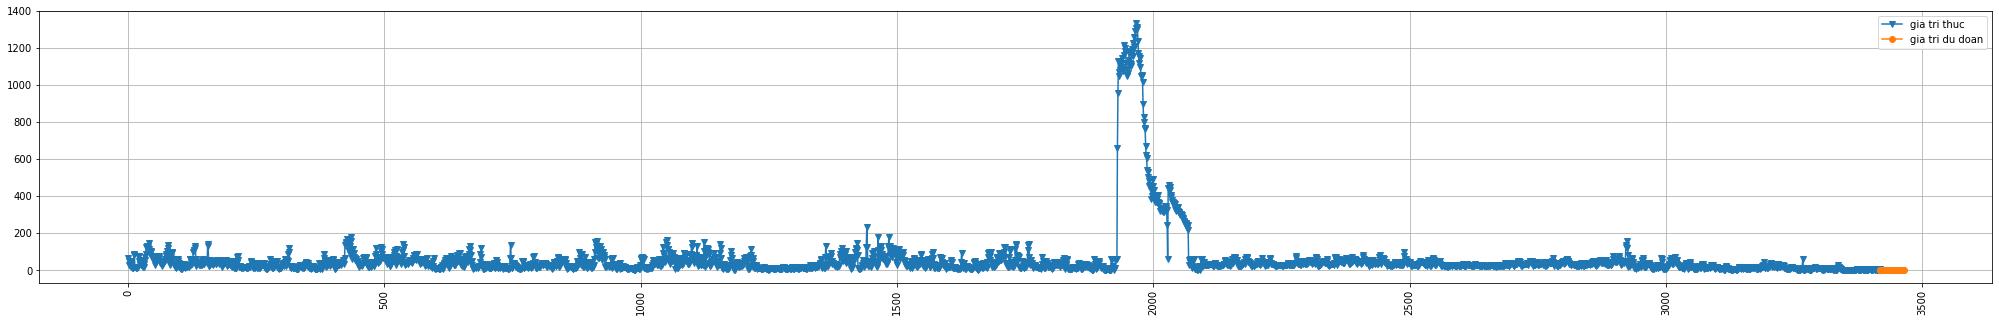

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(35,5))
plt.grid()
plt.plot(data, marker='v', label='gia tri thuc')
plt.plot( res['NOx'], marker='o', label='gia tri du doan')
plt.xticks(rotation=90)
plt.legend()
plt.show()